# Machine Learning: *The Briefest Survey Ever*

Machine learning, deep learning, artifical intelligence, etc., are phrases often used in contexts ranging from banal media commentaries to research-level monographs.  What's all the excitement about?

Key questions:

  1. What *is* machine learning (or "ML")?
  2. When to *use* ML?

From [Wikipedia](https://en.wikipedia.org/wiki/Machine_learning): "*Machine learning (ML) is the study of computer algorithms that improve automatically through experience*"

 <img src="wordcloud.png" alt="ML word cloud from https://cmci.colorado.edu/classes/INFO-4604/" width="800"> 
 (From: https://cmci.colorado.edu/classes/INFO-4604/)

*My take<sup>*</sup>: Machine learning is most often **"the answer"** when 
  
  1. **data input is unbounded** and/or 
  2. **output should improve  with continued "learning"**.

Machines are used for processes someone expects to repeat (otherwise, why?); both (1) and (2) represent such processes.  If that process stops, so, too, does the "learning."



<font color=lightgray><sub>*I'm no expert, but I dabble and like to make sense of BS (bologna sausage).  Much of machine learning has been around since before it was called that.  The real value ML has is it's role as the banner under which the exponential-info-growth generation(s) can data socializ...analyze.</sub></font>

# Case Study 1 - The Creepy Know-What-You-Want Services<sup>*</sup>

Netflix, Hulu, Amazon, etc., have a <s>weird</s> helpful way of knowing what you want.  How so?

Consider Netflix, which has lots of movies, lots of users, and the star ranking of movies by those users.  

Suppose user $i$ has has ranked movie $j$ with the value $s_{ij}$.  A whole matrix $\mathbf{S}$ of these scores can be formed:

$$
\mathbf{S} = \left [
\begin{matrix}
s_{11} & s_{12} & \ldots & s_{1j} & \ldots & s_{1,n} \\
s_{21} & s_{22} & \ldots & s_{2j} &   & \\
\vdots &    & \ddots  &  & \ldots  &\\
 s_{i1} & s_{i2} &   & s_{ij}  &  &  \\
  \vdots &    &  &   & \ddots \\
  s_{m,1}   &   &   &  & & s_{mn} \\
\end{matrix} \right ] \, ,
$$

for $m$ users and $n$ movies.  

The problem is, **what if $s_{ij}$ doesn't exist?**  Despite COVID-19, we can't watch all the movies.

Assume some sort of relationship between known scores and unknown scores! 

A *simple* option is this seemingly *linear* model:

$$
    \mathbf{S} = \mathbf{A} \mathbf{B}
$$

where $\mathbf{A} \in R^{m\times r}$,  $\mathbf{B} \in R^{r\times n}$, and $r \leq \min(n, m)$. 

For three users each of whom have watched some (but not all) of five movies, one possible model is

$$
\mathbf{S} = \left [
    \begin{matrix}
    s_{11} & s_{12} & ? & s_{14} & ? \\
    ? & ?      & s_{23} & s_{24} & s_{25}    \\
    s_{31} & s_{32} & s_{33} & ? & s_{35}     \\
    \end{matrix} \right ] =
\left [
    \begin{matrix}
    a_{11}  & a_{12} \\
    a_{21}  & a_{22}  \\
    a_{31}  & a_{32} \\
    \end{matrix} \right ] 
\left [
    \begin{matrix}
    b_{11} & b_{12} & b_{13} & b_{14}  & b_{15} \\
    b_{21} & b_{22} & b_{23} & b_{24}  & b_{25} \\
    \end{matrix} \right ]  = \mathbf{AB}   \, .
$$

Inspection suggestions we've got 10 known scores and 16 unknowns in those matrices $\mathbf{A}$ and $\mathbf{B}$.  Too many unknowns for too few equations, so the basic tool box won't cut it.  We need instead the [singular-value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) and variants thereof!

First, a brief SVD example.  Consider this ssspectacular image:

In [1]:
import urllib
url = 'https://unsplash.com/photos/f1q4NlVRYSc/download?force=true&w=2400'
urllib.request.urlretrieve(url , 'snake.jpg')
import matplotlib.pyplot as plt
A_rgb = plt.imread('snake.jpg')   # 1737x2400 matrix of RGB tuples
plt.imshow(A_rgb)

To simplify things, reshape the matrix so that R, G, and B are separate columns.  Remember, images are just matrices, and for color images, we have effectively a matric per color channel.

In [2]:
import numpy as np
A = np.array(A_rgb.reshape((A_rgb.shape[0], A_rgb.shape[1]*A_rgb.shape[2])), dtype='float')

Now, we can compute the SVD.  Mathematically, the SVD is written

$$
  \mathbf{A} = \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^T \, .
$$

where $\mathbf{U} \in R^{m, n}$, $\boldsymbol{\Sigma} \in R^{n, n}$ is a diagonal matrix of strictly nonnegative *singular* values $\sigma_i,\, i = 1\ldots n$ such that $\sigma_i \geq \sigma_{i+1}$, and $\mathbf{V} \in R^{n, n}$. 

Many details are beyond the present scope, but one can show that the *truncated* SVD  $\mathbf{U}$ yields the approximation $\mathbf{A}_r = \mathbf{U}_r \boldsymbol{\Sigma}_r \mathbf{V}_r^T$ that uses the first $r$ columns $\mathbf{U}$ and minimizes

$$
  || \tilde{\mathbf{A}} - \mathbf{A} ||_F  \, .
$$

among all possible rank-$r$ approximations $\mathbf{\tilde{A}}$ of $\mathbf{A}$.  Here, $||\cdot||_F$ is the Frobenius norm (equivalent to the mean-squared-error of the columns).  In other words, the (truncated) SVD gives us a nice way to make a cheap approximation to a matrix (or image).  Let's compute that for our ssssilly friend:


In [3]:
U, sigma, V = np.linalg.svd(A, compute_uv=True) # sigma is a 1-d array

The magnitudes of the singular values in `sigma` quantify the information contained by each column of `U`, which is neat to see graphically:

Text(0.5, 1.0, 'Most information in first ~100 singular values.')

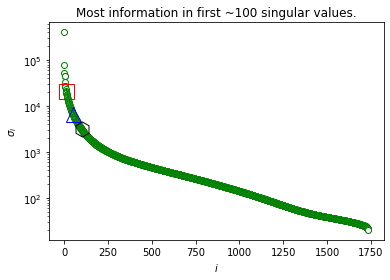

In [4]:
plt.semilogy(sigma, 'go', mfc='w')
plt.semilogy(10, sigma[10], 'rs', 50, sigma[50], 'b^', 100, sigma[100], 'kh', mfc='None', ms=15)
plt.xlabel('$i$'); plt.ylabel('$\sigma_i$'); plt.title("Most information in first ~100 singular values.")

Now, truncate the SVD (using just `r` columns of `U`), reconstruct `A`, and then put back into RGB form for several values of `r`:

Text(0.5, 1.0, 'n=100,  92.9% compression')

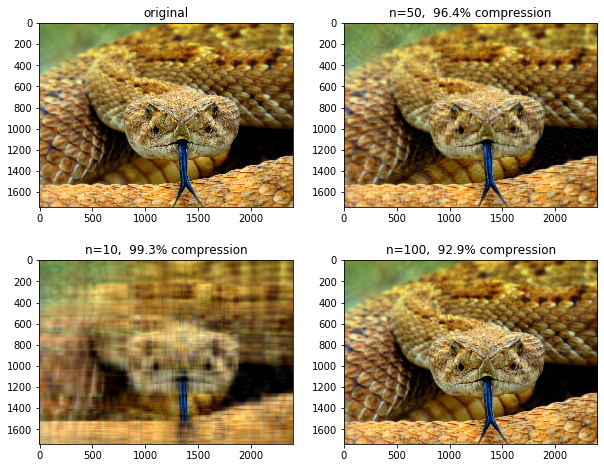

In [5]:
A_r = []
for r in [10, 50, 100]:
    Sigma = np.diag(sigma) # make Sigma a diagonal matrix
    A_r.append(U[:, :r]@(Sigma[:r, :r]@V[:r, :])) # one can also try sklearn.decomposition.TruncatedSVD
    A_r[-1] = np.array(A_r[-1].reshape((1737, 2400, 3)), dtype='i')
    A_r[-1][A_r[-1]<0]=0; A_r[-1][A_r[-1]>255]=255;
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
axes[0, 0].imshow(A_rgb); axes[0,0].set_title('original')
tmpl = 'n={},  {:.1f}% compression'
comp = lambda n: (1-(U.shape[0]+V.shape[0])*n/A.shape[0]/A.shape[1])*100
axes[1, 0].imshow(A_r[0]); axes[1,0].set_title(tmpl.format(10, comp(10)))
axes[0, 1].imshow(A_r[1]); axes[0,1].set_title(tmpl.format(50, comp(50)))
axes[1, 1].imshow(A_r[2]); axes[1,1].set_title(tmpl.format(100, comp(100)))

Cool!  SVD is a great tool, but for our scores, we have two problems.  The missing values can't willy-nilly be set to zero (which we would need to do to use the SVD), and our scores ought to be constrained to positive values.  We'll use a nonnegative matrix factorization!  

To play a bit, we'll use rating data available [here](https://grouplens.org/datasets/movielens/100k/) that originates from U. Minnesota.  This particular data includes 100,000 ratings (1 through 5) for nearly 1000 users and nearly 1700 movies.  Lots of additional information is included, but we'll stick with just users, movies, and ratings.

In [6]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import os.path
import os

file_path = './ml-100k/u.data'
if not os.path.exists(file_path):
    url = "http://files.grouplens.org/datasets/movielens/ml-100k.zip"
    urllib.request.urlretrieve(url , 'ml-100k.zip')
    os.system('unzip ml-100k.zip')
    
names = ['user_id', 'item_id', 'rating']
df = pandas.read_csv(file_path, sep='\t', usecols=(0,1,2), names=names)
df.user_id -= 1 # start indexing 
df.item_id -= 1 # from zero
df.head()

,user_id,item_id,rating
0,195,241,3
1,185,301,3
2,21,376,1
3,243,50,2
4,165,345,1


Now, we can compute the score matrix $\mathbf{S}$:

In [7]:
# create the score matrix
m = len(df.user_id.unique())
n = len(df.item_id.unique())
S = np.zeros((m, n))
for i in range(len(df)):
    S[df.user_id[i], df.item_id[i]] = df.rating[i]

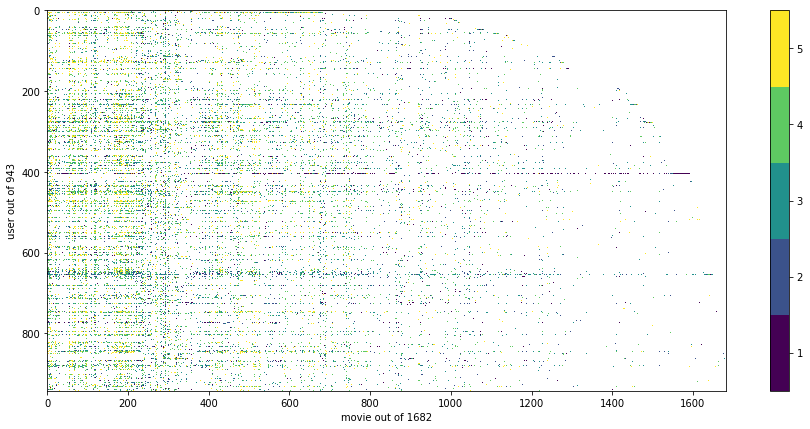

In [8]:
S_mask = np.ma.array(S, mask=(S==0))
import matplotlib
cmap = matplotlib.cm.get_cmap('viridis', 5)
cmap.set_bad('w', 1)
plt.figure(figsize=(16,7))
im=plt.imshow(S_mask, cmap=cmap, vmin=0.5, vmax=5.5)
plt.colorbar(im, ticks=[1,2,3,4,5])
plt.xlabel(f'movie out of {S.shape[1]}'); plt.ylabel(f'user out of {S.shape[0]}');
# user ~400 is a critic.

We have lots of data.  It seems maybe obvious that we should use it all, but if we do, how can we test how good we are for new information?

More often, we take existing data and split it into two pieces: one for training (fitting) the model, and another for testing (predicting).  Here, we want to include all users and all movies in both the "training" and "test" data.  Let's train with about 80% of the data, leaving 20% for testing.  To do so, we'll randomly select 80% of the ratings per user to keep for training.

In [9]:
np.random.seed(1234)
test  = 1*S
train = 0*test
fraction = 0.8 # keep this fraction to train
for i in range(m):
    num_ratings = sum(S[i, :]>0) 
    num_train = int(np.round(fraction*num_ratings))
    movies = np.flatnonzero(S[i]) # which movies user rated
    movies_train = np.random.permutation(movies)[:num_train] # which of these to train with
    train[i, movies_train] = S[i, movies_train] 
    test[i, movies_train] = 0

To find our factorization $\mathbf{S} = \mathbf{AB}$, we'll use non-negative matrix factorization (NMF) from `sklearn`.  

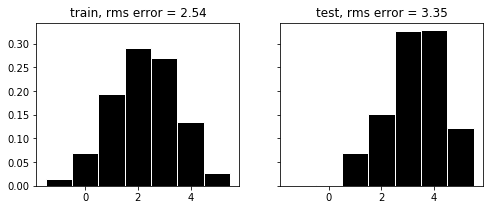

In [10]:
from sklearn.decomposition import NMF
r = 10 # the number of columns of A
model = NMF(n_components=r) 
model.fit_transform(train) 
A_train = model.transform(train) # A is computed for each case
B = model.components_            # B is fixed
S_train = A_train@B              # recreate training data
A_test = model.transform(test);  
S_test = A_test@B                # recreate test data
error_train = (train - S_train).flatten()[train.flatten()>0]
error_test = (test - S_test).flatten()[test.flatten()>0]
fig, axes = plt.subplots(1,2, sharey=True, figsize=(8,3))
axes[0].hist(error_train, np.arange(-1.5, 6.5), color='k', edgecolor='w', density=True);
axes[0].set_title('train, rms error = {:.2f}'.format(np.sqrt(np.mean(error_train**2))))
axes[1].hist(error_test, np.arange(-1.5, 6.5), color='k', edgecolor='w', density=True);
axes[1].set_title('test, rms error = {:.2f}'.format(np.sqrt(np.mean(error_test**2))));

The test error is almost always sure to be larger than the training error.  If both the trial and test errors are *too large* on the average, you are underfitting and need to expand your model (here, increase `k`).  If the errors vary too much, you likely need more input data.  The best case scenario is a small, average error and small spread about that error.

Keep in mind the magnitudes involved:

  - $943 \times 1682 = 1586126$ possible scores
  - $100000$ known  scores 
  - $1586126 - 100000 = 1486126$ scores to estimate
  - number of unknown parameters is $(943+1682)\times r$ (or 26250 for $r=10$).

**Exercises**: 

  1. How does the error (for training and testing) depend on the value $r$?  Make a loop, and graph the result. Note, $r=10$ is *very* small and an error of 2 or 3 means we might as well flip a coin.  You should be able to find a value for $r$ such that the rms error for the training data is around 1.0.  Use this $r$ for the problems below.
  2. Consider user `68` (row `67` in our `S` matrix).  Has this user
     rated the movie *Trainspotting*, and if so, what is that rating?  The file `u.item` lists all movies in the database.  Remember to offset by 1 when indexing `S`.
  3. Predict how user `68` would rate *Chasing Amy*.

In [11]:
# YOUR CODE HERE

# Case Study 2 - Who Belongs Where?



Clustering is one of the most common applications of *unsupervised* ML.  Among the algorithms available for clustering, the [$k$-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) may be the easiest to understand.

The main idea can be illustrated in 2-D.  Consider the following plot, which shows the (scaled and normalized) elastic modulus and yield strength of 60 component samples. 

Text(0, 0.5, 'yield strength [arb unit]')

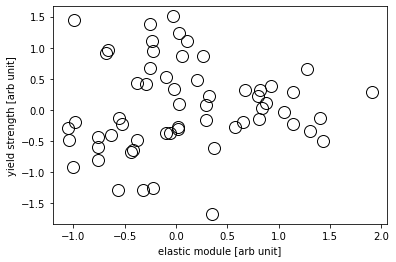

In [12]:
np.random.seed(1234)
n = 20
Z = np.zeros((60, 2))
Z[ 0:20, :] = np.random.multivariate_normal([0, 1], 0.2*np.array([[1.0, 0.1], [ 0.1, 1.0]]), n)
Z[20:40, :] = np.random.multivariate_normal([1, 0], 0.2*np.array([[1.0,-0.1], [-0.1, 1.0]]), n)
Z[40:60, :] = np.random.multivariate_normal([-0.5,-0.5], 0.2*np.array([[1.0, 0.2], [ 0.2, 1.0]]), n)
plt.plot(Z[:, 0], Z[:, 1], 'ko', ms=12, mfc='None')
plt.xlabel('elastic module [arb unit]')
plt.ylabel('yield strength [arb unit]')

Without knowing more about tolerances, it's hard to say whether these measured values are good.  However, we suspect that that our vendor is sourcing the components from different manufacturers.  Is it possible to determine the number of manufacturers and from which manufacture a sample came?  

The $k$-means algorithm may be able to help us.  The basic idea is as follows:
  1. Assume the collection of points (here, that's a modulus and yield strength coordinate) represents members of $m$ groups.
  2. Randomly select the "center" of $m$ groups.
  3. Figure out which group center each point is closest to and assign it to that group.
  4. Recompute the group centers based on the centroid of the assigned members.
  
Although we could implement this, `sklearn` can do it for us.

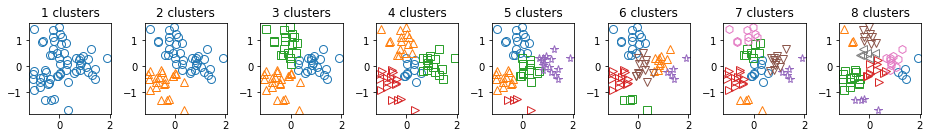

In [13]:
from sklearn.cluster import KMeans
fig, axes = plt.subplots(1, 8, figsize=(13,2))
models = []
for j in range(8):
    n = 1+j
    model = KMeans(n_clusters=n)
    model.fit(Z); models.append(model)
    groups = model.labels_
    markers = ['o', '^', 's', '>', '*', 'v', 'h', '<', 'x']
    for i in range(n):
        x = Z[groups==i, 0]
        y = Z[groups==i, 1]
        axes[j].plot(x, y, ls='None', marker=markers[i], mfc='None',markersize=8)
    axes[j].set_title(f"{n} clusters")
plt.tight_layout(True)

Remember, beyond setting $n$, this is unsupervised, but

   1. What has the algorithm learned for us?  
   2. Which number of clusters seems most "useful?"

The true answer is 3 (the data come from 20 samples of three independent distributions).  How might you conclude that yourself?  Possible metrics include [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion) and [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion), which favor good fits (here, small distances from a point $\mathbf{r}_{\text{point}}$ to its group center $\mathbf{r}_{\text{group}}$) and penalize complexity (here, more clusters).  

**Exercises** 

 1. For the models above, compute the "pseudo" BIC value defined as 

    $$
      \text{BIC} = \sum_{\text{group}} \, \sum_{\text{point} \in \text{group}} |\mathbf{r}_{\text{point}} - \mathbf{r}_{\text{group}}|^2 + 
      d k \log(n) \, .
    $$

    where $n$ is the number of points, $d$ is the dimension (here, 2), $k$ is the number of clusters, 
    $\mathbf{r}_{\text{point}}$ is the coordinate of a point, and $\mathbf{r}_{\text{group}}$ is the coordinate 
    of a group center.  Which $k$ minimizes the BIC?

# Case Study 3 - Given $\mathbf{x}_i$ and $y_i$, $i \in S$ how to predict $y_j$ for $\mathbf{x}_j$, $j \not\in S$?

This is the problem of *regression*, for which lots of techniques exist.  From a strictly mathematical point of view, we can write this as an optimization problem, say

$$
   \min_{\boldsymbol{\theta}} \sum_{i\in S} |y_i - f(\mathbf{x}_i, \boldsymbol{\theta}) |^2 \, ,
$$

where, given the model $f$, we want to compute the parameters $\boldsymbol{\theta}$ that best reproduce the observations $y_i$ at each point $\mathbf{x}_i = [x_1, x_2, \ldots x_{n}]^T$.  

The simplest cases are linear combinations, e.g.,

$$
 y(\mathbf{x}) \approx f(\mathbf{x}, \boldsymbol{\theta}) =    \theta_0 + \boldsymbol{\theta_{1:}}^T  \mathbf{x}  = \theta_0 + \theta_1 x_1 +\dots +\theta_{n} x_{n} \, .
$$

However, for a finite vector $\boldsymbol{\theta}$, it's generally impossible to fit data that comes from real, nonlinear processes. 

A common technique that can handle arbitrary processes is based on a pretty simple fix to the linear model.  

Given those same inputs $\mathbf{x}_i \in R^{n\times 1}$, compute the linear transformation

$$
  \mathbf{z}'_i = \boldsymbol{\Theta}^T_1 \mathbf{x}_i \, ,
$$

where $\boldsymbol{\Theta} \in R^{n\times m_1}$ and, hence, $\mathbf{z}'_i \in R^{m_1\times 1}$.  If $m_1 = 1$, then $\mathbf{z}'_i = z'_i = y_i$ is our linear model from above, and we can directly apply a minimizer to compute the unknown $\boldsymbol{\Theta}$.

If $m_1 \neq 1$, we can apply an arbitrary (but nonlinear) function $\mathbf{g}_1$ to the output $\mathbf{z}'_i$, or 

$$
   \mathbf{z}_i = \mathbf{g}(\mathbf{z}'_i) = \mathbf{g}_1(\boldsymbol{\Theta}^T_1 \mathbf{x}_i) \, .
$$

Eventually, we do need to compute $y_i$, and so we could define another $\boldsymbol{\Theta}_2 = \boldsymbol{\theta}_2 \in R^{m_1 \times 1}$ such that 

$$
   y_i = \boldsymbol{\theta}^T_2 \mathbf{z}_i = \boldsymbol{\theta}^T_2 \mathbf{g}_1(\boldsymbol{\Theta}^T_1 \mathbf{x}_i) \, .
$$

More generally, we can write

$$
   y_i = \boldsymbol{\theta}^T_k \mathbf{g}_k ( \boldsymbol{\Theta}^T_{k-1} \mathbf{g}_{k-1} ( \ldots \mathbf{g}_1(\boldsymbol{\Theta}^T_1 \mathbf{x}_i) \ldots ) ) \, .
$$

This is a $k$-layer [(artificial) neural network](https://en.wikipedia.org/wiki/Artificial_neural_network) or ANN.  

For large<sup>*</sup> values of $k$, the network is often called [deep](https://en.wikipedia.org/wiki/Deep_learning#Deep_neural_networks), and the resulting model drives much of what is called [deep learning](https://en.wikipedia.org/wiki/Deep_learning).

<sub>*Large is subjective!  Realistically, deep networks are large enough so that at deep enough levels, the original input has been transformed into some specific feature (latent variable) that is similar, in some very vague sense, to what our own brains (real neural networks) produce.</sub>

At the end of the day, however, any neural network is just $y\approx \mathbf{f}(\mathbf{x}, \boldsymbol{\theta})$!  The popularity of neural networks is at least partially due to two facts:
  1. We are very good at matrix-vector products, and 
  2. Certain choices for $\mathbf{g}(\mathbf{x})$ make the derivatives needed for solving $\boldsymbol{\nabla}_{\theta}|y-\mathbf{f}(\mathbf{x},\boldsymbol{\theta})|^2 = 0$ easy to compute.

As an example, we'll use existing data to estimate the strength of concrete given its compositional properties.

The data can be downloaded here: https://www.kaggle.com/maajdl/yeh-concret-data, but the `csv` file is also stored in this repository.  I'm sure you can look up the units, but all we care about is the strength (in MPa).

In [14]:
file_name = "Concrete_Data_Yeh.csv"
concrete = pandas.read_csv(file_name)
concrete.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Lots of options exist for creating and training neural networks in Python, including the increasingly popular [TensorFlow](https://www.tensorflow.org/). However, `sklearn` provides neural networks, so we'll use it again.  

In [15]:
import sklearn.neural_network as nn

To get going, we separate our data into the inputs $\mathbf{X}$ (the first 8 columns) and the output $\mathbf{y}$ (the final column). 

In [16]:
X = concrete[concrete.columns[:8]]
y = concrete['csMPa']

As we did for the movies, we can split this data into training and testing data.  Again, we'll use and 80%/20% split by randomly selecting rows.  Then, we'll scale the inputs to have similar values, which often makes it easier to fit the model.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, test_size=0.2)

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled= scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test) 
# then X_test = scalar.inverse_transform(X_test_scaled)

Then, we can define and fit the network.  To do so, we need to define the number of layers $k$ and the sizes of of the coefficient matrices $\boldsymbol{\Theta}_j, j = 1\ldots k$.  Here we'll use two hidden layers of sizes $m_1 = 8$ and $m_2 = 4$.  For the nonlinear "activation" function $g$, we'll use the rectified linear unit function $g(x) = x H(x)$, where $H(x)$ is the unit step function (1 for $x > 0$, 0 for $x \leq 0$).

In [18]:
model = nn.MLPRegressor(hidden_layer_sizes=(8, 4),
                        activation="relu", 
                        random_state=123, 
                        max_iter=10000)

In [19]:
model.fit(X_train_scaled, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(8, 4), learning_rate='constant',
             learning_rate_init=0.001, max_iter=10000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=123, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

Finally, we can make the prediction using the fitted model and plot the predictions versus the actual values to get a sense of how accurate the predictions are.

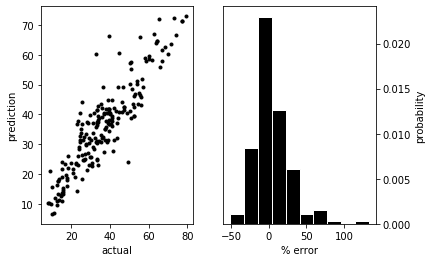

In [20]:
y_pred=model.predict(X_test_scaled)
fig, axes = plt.subplots(1, 2) 
axes[0].plot(y_test, y_pred, 'k.')
axes[0].set_ylabel('prediction')
axes[0].set_xlabel('actual');
axes[1].hist((y_pred-y_test)/y_test*100, color='k', edgecolor='w', density=True);
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set_xlabel('% error')
axes[1].set_ylabel('probability');

**Exercises**

 - Use the code above and find an even better set of parameters.  What do the coefficients look like?  Is `relu` the best option?